<a href="https://colab.research.google.com/github/aidoka22/Python_machinelearning_practice/blob/main/3_Supervised_Learning_in_Practice_The_first_Application_using_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""<br>
 Author: Amin Zollanvari, Ph.D.                            <br>
 Date: Feb, 6, 2024                                       <br>
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""<br>

# 3. Supervised Learning in Practice: The first Application using Scikit-Learn

## 3.1 Supervised Learning

There are two common types of supervised learning: *classification* and *regression*. To formalize the idea of classification and regression, suppose you have a set of training data $\mathcal{S}_{tr}=\{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ..., (\mathbf{x}_n, y_n)\}$ where $\mathbf{x}_i \in \mathbb{R}^p, i=1,...,n$ represents a vector including the values of $p$ feature variables (feature vector), $y_i$ denotes the target value (outcome) associated with $\mathbf{x}_i$, and $n$ is the number of observations (i.e., sample size) in the training data. In *classification*, $y_i$s are a set of predefined finite categories called *labels* and the goal is to assign a given feature vector to one of the class labels (in some applications known as *multilabel classification*, multiple labels are assigned to one class). In *regression*, on the other hand, $y_i$s represent a set of real numbers and the goal is to estimate the target value for a given feature vector. Whether the problem is classification or regression, the goal is to *estimate* the value of the target $y$ for a given feature vector $\mathbf{x}$. In machine learning and pattern recognition, we refer to this estimation problem as *prediction*; that is, predicting $y$ for a given $\mathbf{x}$. At the same time, we refer to the mathematical function that performs this mapping as *classifier* or *regressor* in classification and regression problems, respectively. At the same time, the procedure for constructing the classifier/regressor is referred to as classification/regression *rule*. Therefore, a classifier, for example, is the outcome of a classification rule.

<img align="left" src="images/tip.png" alt="drawing" width="140"/><br>

The the literal meaning of "regression" means "a return to a former state". While there is no ambiguity on why we refer to a classification problem as "classification, you may wonder why a regression problem is referred to as "regression". To see the answer check this out: https://en.wikipedia.org/wiki/Regression_toward_the_mean

## 3.2 Scikit-Learn

Scikit-Learn is a Python package that contains efficient and uniform API to implement many machine learning (ML) methods. Three fundamental objects in scikit-learn are Estimators, Transformers, and Predictors:

**Estimators**:
<a id='sklearn'></a>
Any object that can estimate some parameters based on a dataset is called an ``estimator``. For example,  all machine learning models whether classifiers or regressors are implemented in their own ``Estimator`` class. For example, a ML algorithm known as *K*-nearest neigbors (KNN) rule is implemented in the ``KNeighborsClassifier`` class in the ``neighbors`` module. Or another algorithm known as perceptron is implemented in the ``Perceptron`` class in the ``linear_model`` module.

All estimators implement the ``fit()`` method that takes either one parameter (data) or two as in supervise learning where the second parameter is the target values:

``estimator.fit(data, targets)``

or

``estimator.fit(data)``

The ``fit()`` method performs the estimation itself; that is, to learn some parameters from the data.

**Transformers**:

Some estimators can also transform the data. These estimators are known as transformers and implement ``transform()`` method to perform the transformation of the data as:

``new_data = transformer.transform(data)``

Transformers also implement a convenient method known as ``fit_transform()``, which is similar (sometimes more efficient) to calling ``fit()`` and ``transform()`` back-to-back:

``new_data = transformer.fit_transform(data)``

**Predictors**:

Some estimators can make predictions given a data. These estimators are known as predictors and implement ``predict()`` method to perform the prediction:

``prediction = predictor.predict(data)``

Classification algorithms generally also implement

``probability = predictor.predict_proba(data)``

that provides a way to quantify the certainty of a prediction for a given data.

## 3.3 The Problem: Iris Flower Classification

In this application, we would like to train a ML rule that recieves a feature vector containing morphologic measurements (length and width of petals and sepals in centimeters) of Iris flowers and classify, if possible, the feature vector to one of three Iris flower species: Iris setosa, Iris virginica, or Iris versicolor (see Figure 1).

 <img align="top" src="images/S3_fig1.png" alt="drawing" width="440"/><br>

Figure 1: An Iris flower, sepal, and petal. The hypothesis in this example is that an Iris flower can be classified into its speciies based on its petal and sepal length and width.

Therefore, our feature vectors $\mathbf{x}_i$ that are part of training data are four dimensional ($p=4$) and $y$ can take three values; therefore, we have a multiclass (three-class) classification problem.

For that we use a well-known dataset in statistics and machine learning, known as *Iris dataset* that was collected by one of the most famous biologist-statistician of 20th century, Ronald Fisher (for more information about this dataset, see https://en.wikipedia.org/wiki/Iris_flower_data_set). This dataset is already part of scikit-learn and can be accessed by importing its ``datasets`` module as follows:

In [2]:
from sklearn import datasets # sklearn is the Python name of ,!scikit-learn
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

Datasets that are part of scikit-learn are generally stored as ``Bunch`` objects. This is an object that contains the actual data as well as some information about it. All these information are stored in ``Bunch`` objects similar to dictionaries; that is, using ``keys`` and ``values``. Similar to dictionaries, we can use ``key()`` method to see all keys in a ``Bunch`` object:

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The value of the key ``DESCR`` gives some brief information about the dataset. Nevertheless, ``Bunch`` object privides an additional benefit that we can also access values as ``bunch.key`` (or, equivalnetly, as in dictionaries by ``bunch['key']``). Here we just print the first 500 characters in the ``DESCR`` field:

In [4]:
print(iris.DESCR[:500])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                



All measurements (i.e., feature vectors) are stored as values of ``data`` key with the corresponding classes being stored in ``target`` field as NumPy arrays:

In [5]:
iris.data[10:]

array([[5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3

We refer to the matrix containing all feature vectors as ``data matrix`` (also known as ``feature matrix``). By convention, scikit-learn assumes this matrix has the shape of sample size $\times$ feature size; that is, the number of observations (also sometimes referred to as the number of samples) $\times$ the number of features. For example, in this data there were 150 Iris flowers and for each there were 4 features; therefore, the shape is 150 $\times$ 4:

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The three classes in the dataset, namely, setosa, versicolor, and virginica are integer encoded as 0, 1, and 2, respectively. Integer encoding of feature vectors and even labels is a common practice. For the feature vectors this is generally needed as many machine learning methods are designed to work with numeric data. For the labels, at least this uses less memory.

In [ ]:
print(iris['target_names']) # or, equivalently, print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Here we use ``bincount`` function from NumPy to count the number of samples in each class:

In [ ]:
import numpy as np
np.bincount(iris.target)

array([50, 50, 50])

In [ ]:
print('type of data: ' + str(type(iris.data))+ '\ntype of target: ' + str(type(iris.target)))

type of data: <class 'numpy.ndarray'>
type of target: <class 'numpy.ndarray'>


In [ ]:
print(iris.feature_names) # the name of features

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## 3.4 Test Set for Model Assessment

Before training a machime learning model here, we need to think a bit in advance. Let's say you train a model based on the data. How good is your model? This is a critical question that shows the predictive capacity of the trained model.

Perhaps the most intuitive one is to assess the performance of the trained model on a set of data that is unseen during the training process. This is known as *test set* or *test data*. However, here we only have one dataset. Therefore, to create a test data, we split the data into training (used to train the model) and hold out the rest as test data, also known as holdout set (used to assess the trained model).

To split the data, we can use ``train_test_split`` function from scikit-learn ``model_selection`` module. Just google ``train_test_split`` and see the documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

The few following points are common to remember when using this function:

1. In using scikit-learn, we conventionally denote the data matrix and targets by ``X`` and ``y``, respectively;

2. Although ``train_test_split`` function can recieve an arbitrary number of sequences, in supverised learning it is common to use this function with the data matrix and targets only;

3. Although ``train_test_split`` function returns a list, it is common to use sequence unpacking to name the results of the split;

4. ``train_test_split`` function by default shuffles the data before splitting. This is a good practice to avoid systematic bias in the data; however, to be able to reproduce the results, it is a good practice to set the seed to some integer (e.g., ``random_state= 42``!) Why 42 is common :)? Read this https://en.wikipedia.org/wiki/42_(number) (sepcially parts on Technology, Religion, and Popular Culture). To show there is nothing special about this, in what follows, I use, for example, ``random_state= 100``.

5. The function has a paramater ``test_size`` that represents the proportion of the data that should be part of the test set. The default value of this parameter is 0.25, which is a good rule of thumb if no other specific proportion is desired;

6. It is a good practice to keep the proportion of classes in both the training and the test sets as in the whole data (set ``stratify`` to target).

Using these conventions and tips, we split the data to 80% training and 20% test:

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=100, test_size=0.2, stratify=iris.target)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))
print(X_test)

X_train_shape: (120, 4)
X_test_shape: (30, 4)
y_train_shape: (120,)
y_test_shape: (30,)
[[5.4 3.  4.5 1.5]
 [5.6 3.  4.1 1.3]
 [6.3 2.8 5.1 1.5]
 [6.  3.  4.8 1.8]
 [5.1 3.3 1.7 0.5]
 [6.9 3.1 5.1 2.3]
 [6.2 2.9 4.3 1.3]
 [4.8 3.4 1.9 0.2]
 [5.7 3.  4.2 1.2]
 [5.6 2.7 4.2 1.3]
 [5.5 2.5 4.  1.3]
 [6.5 3.  5.8 2.2]
 [6.8 3.  5.5 2.1]
 [5.4 3.7 1.5 0.2]
 [7.7 2.8 6.7 2. ]
 [5.1 3.4 1.5 0.2]
 [4.6 3.1 1.5 0.2]
 [7.  3.2 4.7 1.4]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [4.4 2.9 1.4 0.2]
 [5.  2.  3.5 1. ]
 [5.1 2.5 3.  1.1]
 [4.7 3.2 1.3 0.2]
 [6.  2.2 5.  1.5]
 [5.7 4.4 1.5 0.4]
 [4.9 3.1 1.5 0.2]
 [6.1 2.6 5.6 1.4]
 [6.3 3.3 6.  2.5]
 [6.2 2.2 4.5 1.5]]


In [9]:
np.bincount(y_train)

NameError: name 'np' is not defined

## 3.5 Data Visualization

To have a sense of data, we look into *pair plots* (we use ``pairplot()`` function from ``Seaborn`` library). As this function expects a ``DataFrame`` an the input, we first convert the ``X_train`` and ``y_train`` arrays to dataframes and concatente them.

In [ ]:
import pandas as pd
X_train_df = pd.DataFrame(X_train, columns=iris.feature_names)
y_train_df = pd.DataFrame(y_train, columns=['class'])
X_y_train_df = pd.concat([X_train_df, y_train_df], axis=1)

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


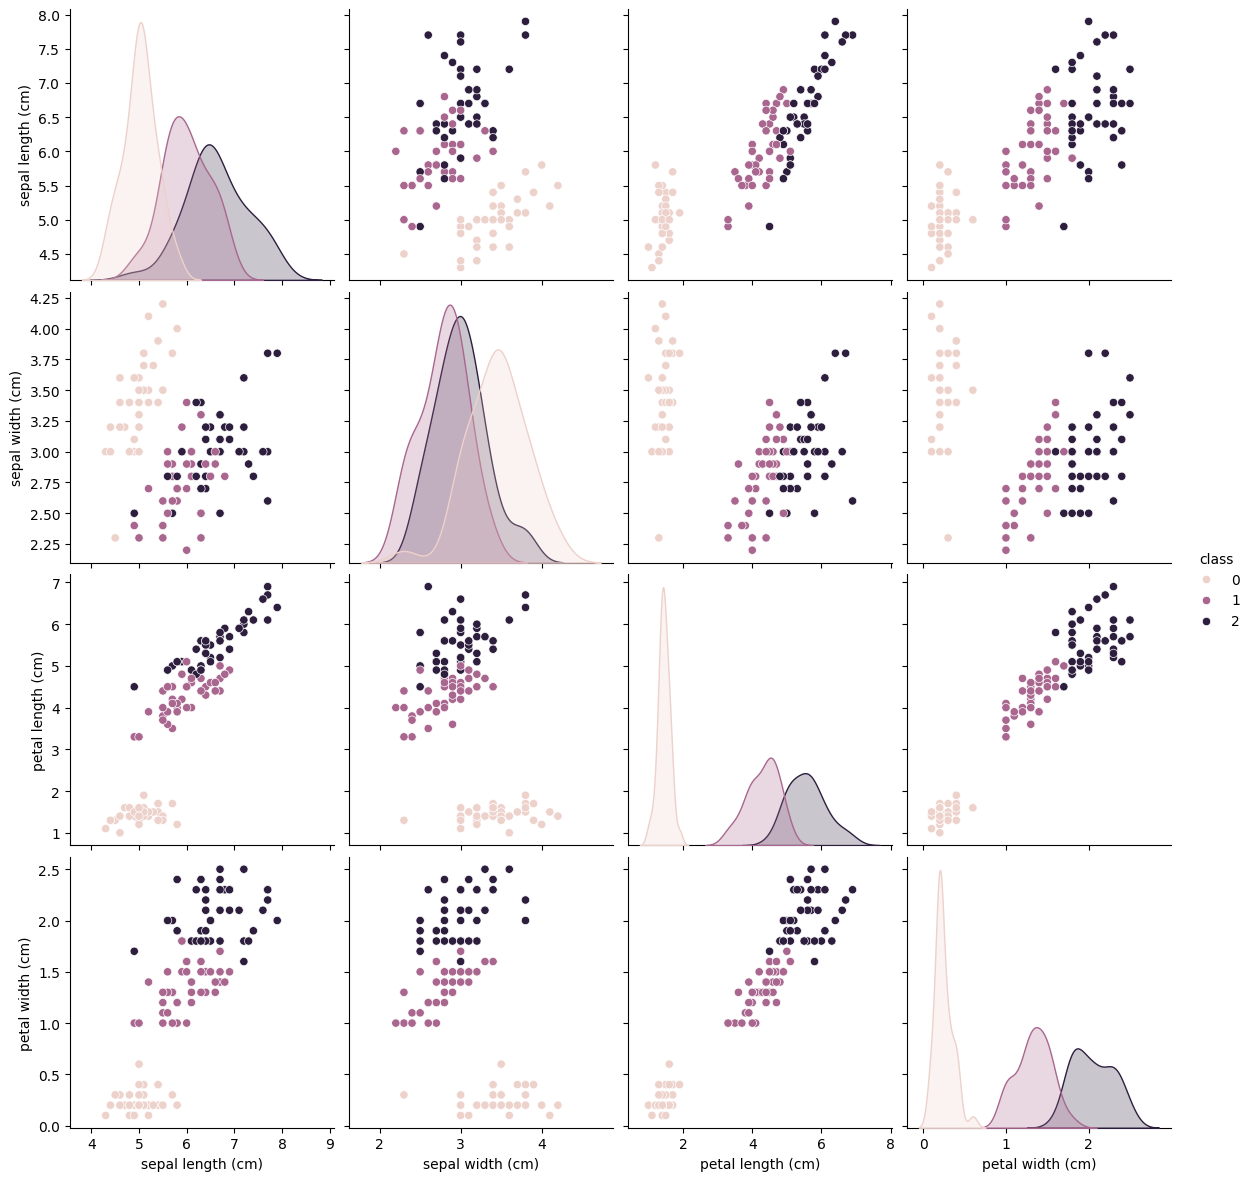

In [ ]:
import seaborn as sns
sns.pairplot(X_y_train_df, hue='class', height=3) # hue is set to the class variable in the dataframe so that they are plotted in different color and we are able to distinguish classes

Diagonal figures show the histogram of variables

## 3.6 Feature Scaling (Normalization)

Two common way for feature scaling include *standardization* and *min-max scaling*:

In standardization, for each column (values for each feature) we subtract the mean of that feature and divide by its standard deviation. This way the feature vector is centered around zero and will have a standard deviation of one. In min-max scaling, we subtract the minimum of a feature and divide it by its range (max - min of that feature).

First let's see how standardization for instance is done using few lines of codes in which we use the built-in NumPy ``mean()`` and ``std()`` functions:

In [11]:
X_train.mean(axis=0)
X_train.std(axis=0)

array([0.8314107 , 0.42581213, 1.7773193 , 0.76754976])

In [12]:
mean = X_train.mean(axis=0) # to take the mean across rows (for each column)
std = X_train.std(axis=0) # to take the std across rows (for each column)
X_train_scaled = X_train - mean # notice the utility of broadcasting
X_train_scaled /= std

In [13]:
X_train_scaled.mean(axis=0) # observe the mean is 0 now

array([-4.21884749e-16,  1.20042865e-16, -3.88578059e-16, -7.04991621e-16])

In [14]:
X_train_scaled.std(axis=0) # observe the std is 1 now

array([1., 1., 1., 1.])

It is important to note that the "test data" should not be used in any stage involved in the training of your model, not even in preprocessing stages such as normalization. This is why here we are applying the normalization to the training data. Once the relevant statistics (here mean and std) are estimated from the training data, they can be used to normalize the test data:

In [15]:
X_test.mean(axis=0)

array([5.70666667, 2.97      , 3.70333333, 1.15333333])

In [16]:
X_test_scaled = X_test - mean
X_test_scaled /= std

Observe that the test data does not necessarily have a mean of 0 or std of 1:

In [17]:
print(X_test_scaled.mean(axis=0))
print(X_test_scaled.std(axis=0))

[-0.20547406 -0.25637284 -0.03844742 -0.07491371]
[0.94499306 1.07303169 0.94790626 0.94534006]


Sikit-learn has transformers for implementing both standardization and min-max scaling. These are ``StandardScaler`` (for standardization) and ``MinMaxScaler`` (for min-max scaling) classes from ``preprocessing`` module:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

To estimate the mean and standard deviation of each feature of the data, we call the ``fit()`` method of ``scaler`` object (afterall, any transformer is an estimator and implements the ``fit()`` method):

In [ ]:
scaler.fit(X_train)

StandardScaler()

Ttransform the training and test data based on the information extracted from training data:

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_test_scaled.mean(axis=0)) # observe that we get the same values for the mean and std of test data as in the naive implementation shown above
print(X_test_scaled.std(axis=0))

[-0.20547406 -0.25637284 -0.03844742 -0.07491371]
[0.94499306 1.07303169 0.94790626 0.94534006]


For later use save arrays using ``numpy.save()`` to binary files:

In [ ]:
#np.savez('data/iris_train_scaled', X = X_train_scaled, y = y_train) # there are commented out so you don't change the datasets given to you
#np.savez('data/iris_test_scaled', X = X_test_scaled, y = y_test) # there are commented out so you don't change the datasets given to you

The ``numpy.save`` and ``numpy.save`` will give the name of a file ``npy`` and ``npz`` extensions, respectively. Later the arrays could be loaded by ``numpy.load()``. Using ``numpy.load()`` for ``npz`` files, return a dictionary-like object using which each array can be accessed either by the keywords we provide when saving the file or ``arr_0``, ``arr_1``, ... if positional arguments were used when saving the file.

## 3.7 Model Training

We are now in the position to train the actual machine learning model. For this purpose, we use the *K*-nearest neighbor (KNN) classification rule in its original form. For example, in Fig. 2, 5NN assigns blue to the test observation because within the 5 nearest observations to this test point, four are from the blue class.

<img align="top" src="images/S3_fig2.png" alt="drawing" width="540"/><br>


Figure 2: The working principle of KNN (here $K=5$). The test point is identified by $\times$. The circle encloses 5 nearest point to the test point.

As mentioned before in Section [3.2](#sklearn), KNN is implemented in the ``KNeighborsClassifier`` class in the ``neighbors`` module. We first instantiate the ``KNeighborsClassifier`` class into an object:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN # we give an alias KNN for simplicity
knn = KNN(n_neighbors=3) # hyperparameter K is set to 3; that is, we have 3NN

"K" in KNN is a *hyperparameter*.

To train the model, we call the ``fit()`` method of the ``knn`` object but because this is a model used for supervised learning, its ``fit()`` method expects both ``X`` and ``y``:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

## 3.8 Prediction using the Trained Model

``KNeighborsClassifier`` is a predictor (implements the ``predict()`` method). Here we use this method to make prediction on a new data point. Suppose we have the following data point measured in the original scales as in the original training data:

In [ ]:
x_test = np.array([[5.5, 2, 1.1, 0.6]]) # you could also write: np.array([5.5, 2, 1.1, 0.6]).reshape(1,4)
x_test.shape

(1, 4)

As we said before, scikit-learn always assumes two-dimensional NumPy arrays of shape sample size $\times$ feature size; this is the reason in the code above the test point ``x_test`` is placed in a two-dimensional NumPy array of shape ``(1, 4)``. However, before making prediction, we need to scale the test data using the same statistics used to scale the training data; afterall, the ``knn`` classifier was trained on scaled data:

In [ ]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[-0.45404756, -2.53437275, -1.50320017, -0.79582245]])

In [ ]:
y_test_prediction = knn.predict(x_test_scaled)
print('knn predicts: ' + str(iris.target_names[y_test_prediction])) # to convert the prediction (y_test_prediction) to the names of Iris flower

knn predicts: ['versicolor']


We can also give a number of samples as the argument to the ``predict()`` method in which case we recieve the classification results for them all:

In [ ]:
y_test_predictions = knn.predict(X_test_scaled)
print('knn predicts: ' + str(iris.target_names[y_test_predictions])) # see fancy indexing in Section 2.1.4


knn predicts: ['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor']


<img align="left" src="images/tip.png" alt="drawing" width="140"/><br>

Note that the above instantiating the class KNN, fitting, and predicting can be combined as the following one liner pattern known as *method chaining*; however, for now we generally present them separatly to facilitate understanding different steps:

In [ ]:
y_test_predictions = KNN(n_neighbors=3).fit(X_train_scaled, y_train).predict(X_test_scaled)
print('knn predicts: ' + str(iris.target_names[y_test_predictions]))

knn predicts: ['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor']


## 3.9 Model Assessment (Error Estimation)

There are various rules and metrics to assess the performance of a classifier. Here we describe the simplest and perhaps the most intuitive one; that is, how bad the classifier performs on a test set. To quantify the performance of the classifier, we just calculate the proportion of misclassified observations in the holdout set (recall that we already have the actual labels for these observations). This proportion is indeed an estimate of *misclassification error rate* (also simply referred to as the error rate), which is defined as *the probability of misclassifying a future (unseen) observation by the trained classifier*.

\begin{align}
{\varepsilon} = P(\text{the}\;\text{trained}\;\text{classifier}\;\text{misclassifies}\;\mathbf{X})\quad\quad (1)
\end{align}

And the *test-set error estimator* to estimate the error rate of the classifier is

\begin{align}
\hat{\varepsilon}_{te} = \frac{k}{m} \qquad\qquad\qquad\qquad\qquad(2)
\end{align}

where $m$ and $K$ are the size of test set and the number of observations in test set that are misclassified by the classifier, respectively.

The *accuracy* and *test-set accuracy estimate* are:

\begin{align}
\text{acc} = 1 - {\varepsilon}\\
\hat{\text{acc}}_{h} = 1 - \hat{\varepsilon}_{te}
\end{align}

Let's find the test-set error estimate:

In [ ]:
errors = (y_test_predictions != y_test)
errors

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False])

In [ ]:
error_est = sum(errors)/errors.size
print('The (holdout estimate of) error rate is: {:.2f}'.format(error_est) + '\n'\
      'The accuracy is: {:.2f}'.format(1-error_est))

The (holdout estimate of) error rate is: 0.10
The accuracy is: 0.90


In the above code, we use the place holder { } and format specifier 0.2f to specify the number of digits after decimal point. The ":" before .2f separates the format specifier from the rest of the replacement field (if any option is set) within the { }.

To estimate the accuracy, we can use the ``accuracy_score`` function (from ``metrics`` module) that expects the actual labels and predicted labels as arguments:

https://scikit-learn.org/0.15/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score
print('The test accuracy is {:.2f}'.format(accuracy_score(y_test, y_test_predictions)))

The test accuracy is 0.90


All classifiers in scikit-learn also have a ``score`` method that given a test data and its labels, returns the classifier accuracy. For example, see the documentation of ``score`` method at:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Therefore, here we can also calculate the accuracy as follows:

In [ ]:
print('The test accuracy is {:.2f}'.format(knn.score(X_test_scaled, y_test)))

The test accuracy is 0.90


### Exercises 1, 2, 3 will be discussed in class